In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans

In [2]:
tc = pd.read_excel("Telco_customer_churn (1).xlsx")

print(tc.describe())

tc.info()

        Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%         

In [3]:
#we have to dro the unnecessary columns
tc.drop(tc.columns[[0,1,2,3,4,13,14,15,16,17,18,19,20]],axis=1 , inplace=True)
tc

,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,None,No,0.00,No,Yes,DSL,8,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,None,Yes,22.77,No,No,None,0,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,11,None,No,0.00,No,Yes,DSL,17,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [4]:
#now we have normalize the numerical columns.
def norm_fnc(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

norm_tc = norm_fnc(tc.iloc[ : , [0,3,7,11,12,13,14,15,16]])
norm_tc.describe()

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.442067,0.459271,0.241358,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967
std,0.345663,0.309024,0.240223,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.184237,0.035294,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859
50%,0.394366,0.457892,0.200000,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551
75%,0.760563,0.728046,0.317647,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Now we have to create dummy variable for categorical columns.

tc_dummy = pd.get_dummies(tc)


In [6]:

tc_new = pd.concat([norm_tc , tc_dummy], axis= 1)
tc_new.describe()

#now the data set has same range in 0 to 1

,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Tenure in Months,...,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.442067,0.459271,0.241358,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967,32.386767,...,0.430924,0.216669,0.512566,0.220077,0.267358,0.407781,0.592219,0.555019,0.390317,0.054664
std,0.345663,0.309024,0.240223,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606,24.542061,...,0.495241,0.412004,0.499878,0.414328,0.442612,0.491457,0.491457,0.496999,0.487856,0.227340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.184237,0.035294,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.394366,0.457892,0.200000,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551,29.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.760563,0.728046,0.317647,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715,55.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(tc_new)
    TWSS.append(kmeans.inertia_)
    
TWSS

[25970003999.66126,
 13817429324.590607,
 9314832554.354395,
 7304894427.257232,
 6105941182.244749,
 5243646089.504217,
 4540982394.902638]

Text(0, 0.5, 'total_within_SS')

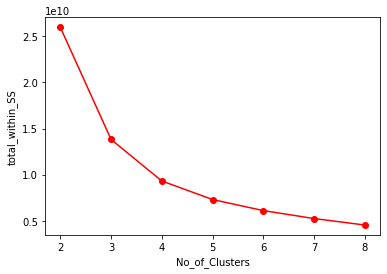

In [8]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [9]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 4)
model.fit(tc_new)

model.labels_ # getting the labels of clusters assigned to each row 


array([1, 1, 2, ..., 3, 1, 3])

In [10]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
tc['category'] = mb # creating a  new column and assigning it to new column 
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   7043 non-null   int64  
 1   Offer                              7043 non-null   object 
 2   Phone Service                      7043 non-null   object 
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Multiple Lines                     7043 non-null   object 
 5   Internet Service                   7043 non-null   object 
 6   Internet Type                      7043 non-null   object 
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Paperless Billing                  7043 non-null   object 
 10  Payment Method                     7043 non-null   object 
 11  Monthly Charge                     7043 non-null   float

In [12]:

tc_final = tc.iloc[:,[17,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
tc_final

,category,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,1,None,No,0.00,No,Yes,DSL,8,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,2,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,2,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,2,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,72,None,Yes,22.77,No,No,None,0,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,2,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,3,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,11,None,No,0.00,No,Yes,DSL,17,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [17]:
tc.iloc[:,2: ].groupby(tc.category).mean()

,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,category
category,,,,,,,,,
0,23.799559,26.748018,84.985683,4435.158722,2.706590,11.506608,1203.625454,5647.584194,0
1,20.698061,17.605378,50.668746,451.571901,1.379737,3.824265,184.026764,638.043193,1
2,23.285407,18.377389,59.736264,2016.436947,2.648749,7.411251,880.823905,2902.023353,2
3,29.419147,27.508532,100.389192,6701.475654,1.689886,10.762230,1943.668999,8654.216997,3
